<a href="https://colab.research.google.com/github/jeevisha3008/Stocks-Prediction/blob/master/ARIMA_Modelling_Apple%20Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pyramid-arima

In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import pyplot
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.stattools import acf, pacf
from scipy.ndimage.interpolation import shift
from statsmodels.tsa.arima_model import ARIMA
from pyramid.arima import auto_arima

In [0]:
from google.colab import files
uploaded = files.upload()

Saving AAPL_data.csv to AAPL_data.csv


In [0]:
import io
df = io.BytesIO(uploaded['AAPL_data.csv'])   
df = pd.read_csv(df)
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [0]:
#setting index as date
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']
df = df.drop(['date','open','high','low','volume','Name'], axis=1)
df.head()

,close
date,
2013-02-08,67.8542
2013-02-11,68.5614
2013-02-12,66.8428
2013-02-13,66.7156
2013-02-14,66.6556


In [0]:
## Looking at components of the closing price

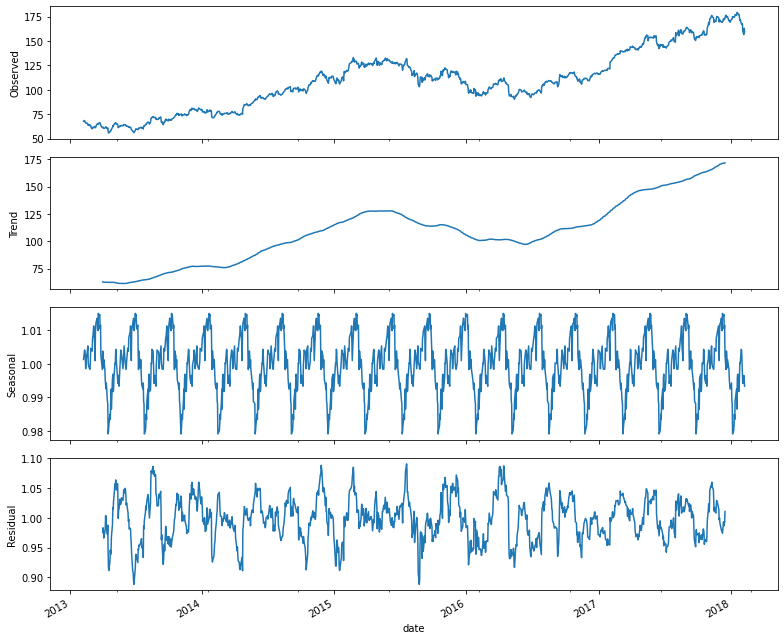

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(df['close'], model='mutiplicative',freq=70)
fig = decomposition.plot()
plt.show()

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [0]:
#There is trend and seasonality present so our data is not stationary

In [0]:
# Run the ADF test on the price series and print out the results
results = adfuller(df['close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(-0.6650906914089914, 0.8555858445838954, 0, 1258, {'1%': -3.4355588184378574, '5%': -2.8638402312881497, '10%': -2.5679946684494275}, 4643.052900365605)
The p-value of the test on prices is: 0.8555858445838954


In [0]:
# We can also check the stationarity through the ADF test. Since, the p-value is more than 0.05 we fail to reject that the closing price is a random walk.

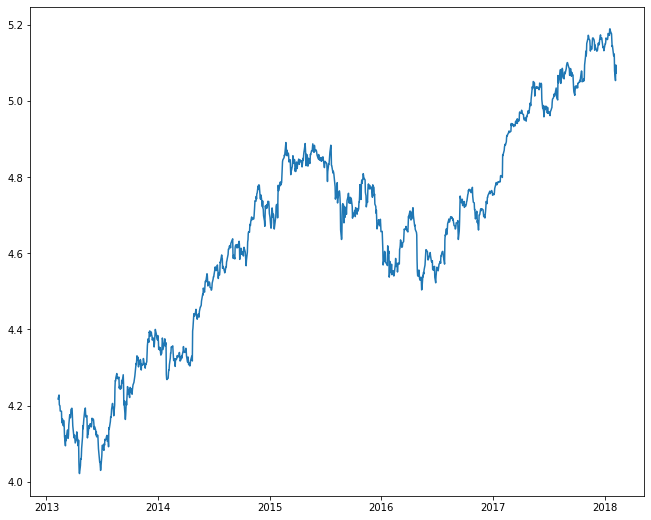

In [0]:
##to reduce trend- log penalizes the higher values
lnprice=np.log(df['close']) 
plt.plot(lnprice)

In [0]:
# Create a DataFrame of EBAY returns
df_ret = lnprice.pct_change()

# Eliminate the NaN in the first row of returns
df_ret = df_ret.dropna()

In [0]:
df_ret.head()

date
2013-02-11    0.002459
2013-02-12   -0.006005
2013-02-13   -0.000453
2013-02-14   -0.000214
2013-02-15   -0.003304
Name: close, dtype: float64

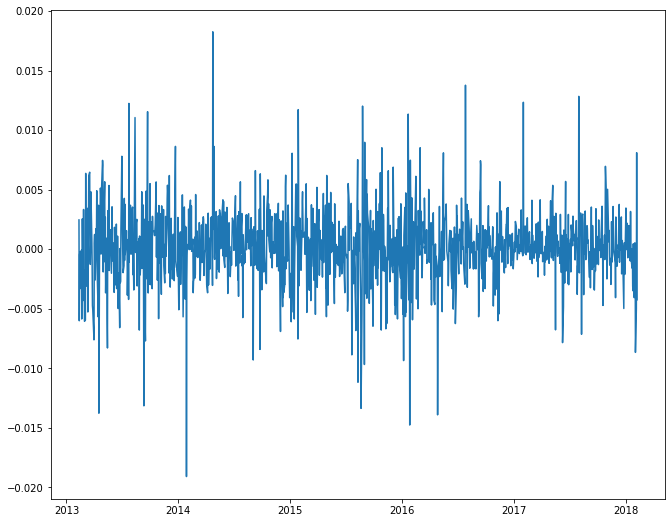

In [0]:
plt.plot(df_ret)

In [0]:
# Run the ADF test on the return series and print out the p-value
results = adfuller(df_ret)
print('The p-value of the test on returns is: ' + str(results[1]))

## the p-value of results is less than 0.05 so we can reject our null hypothesis that returns follow a random walk.

The p-value of the test on returns is: 0.0


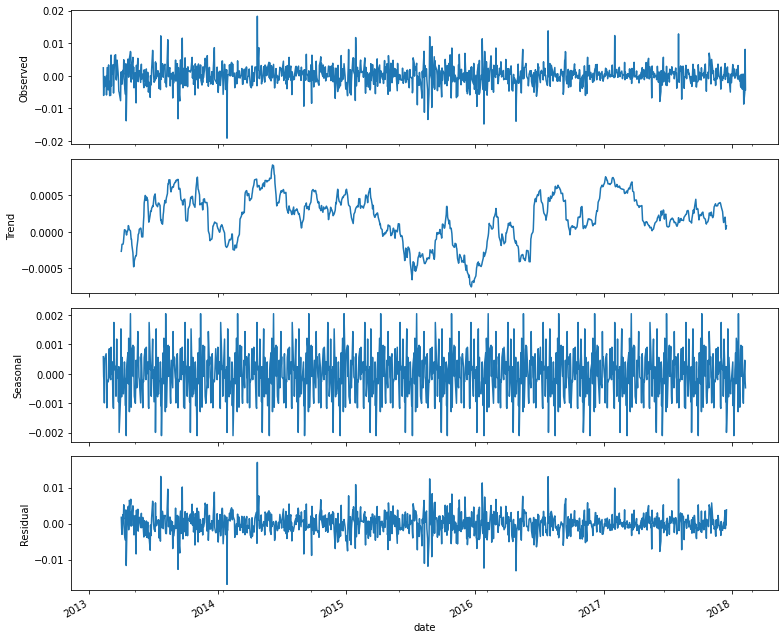

In [0]:
# Components of stock returns

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(df_ret, model='additive',freq=70)
fig = decomposition.plot()
plt.show()

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [0]:
# Stationarity of residuals

residual = residual.dropna()
results = adfuller(residual)
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 0.0


The autocorrelation of weekly returns is 1.00
[1.         0.99686228 0.99355317 0.99054491 0.9873843  0.98384055
 0.98023732 0.97668569 0.97296233 0.96919668 0.96531651 0.9612223
 0.95711256 0.953063   0.94892442 0.9445953  0.94022341 0.93600036
 0.93163881 0.92744488 0.92323934 0.91898693 0.91469883 0.91055758
 0.9065262  0.9025506  0.89874889 0.8950586  0.89133726 0.88764161
 0.88402086 0.88020384 0.87643091 0.87257763 0.86869215 0.86458141
 0.8607812  0.85716749 0.85355215 0.84985487 0.8461225 ]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


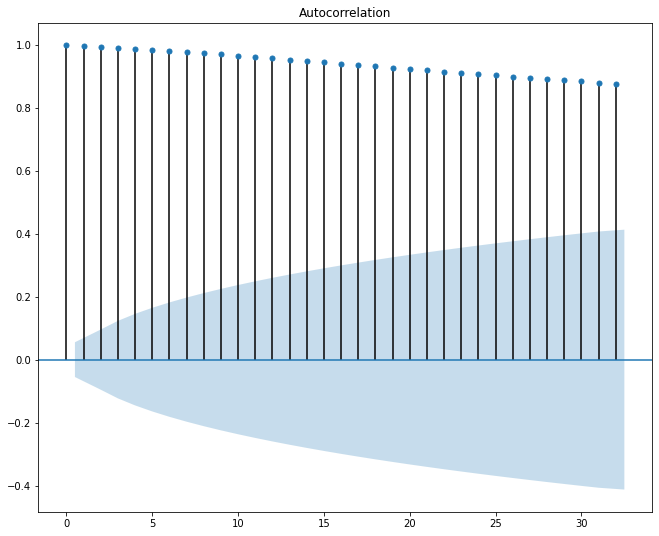

In [0]:
# Autocorrelation of original price

autocorrelation = df['close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

acf_array = acf(df['close'])

print(acf_array)

plot_acf(df['close'])
pyplot.show()

The autocorrelation of weekly returns is 0.03


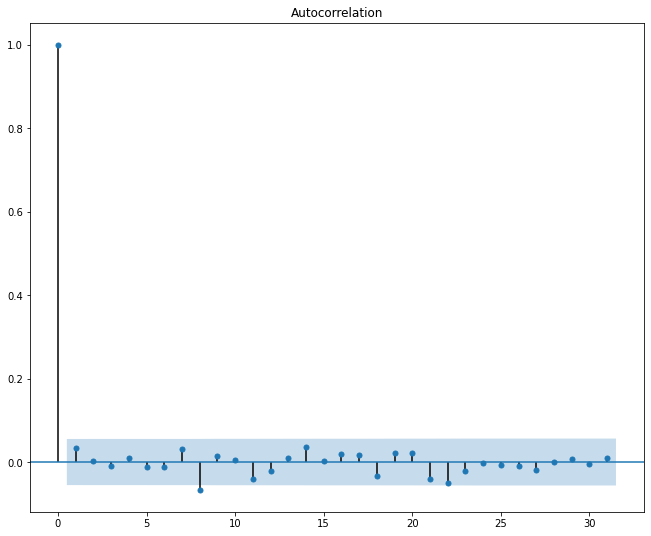

In [0]:
autocorrelation = df_ret.autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

plot_acf(df_ret)
pyplot.show()

In [0]:
acf_ret = acf(df_ret)
acf_ret

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.00000000e+00,  3.44125155e-02,  1.77592129e-03, -9.23165636e-03,
        1.01551749e-02, -1.17589895e-02, -1.25586979e-02,  3.16707516e-02,
       -6.59884637e-02,  1.39491237e-02,  3.92990067e-03, -4.08973625e-02,
       -2.24167685e-02,  8.64379744e-03,  3.58589628e-02,  1.34500136e-03,
        1.84191574e-02,  1.68796082e-02, -3.37927205e-02,  2.22386876e-02,
        2.06106394e-02, -4.06386658e-02, -5.08221745e-02, -2.24892528e-02,
       -1.54885421e-03, -6.70424493e-03, -9.45782705e-03, -1.85417009e-02,
       -2.92159527e-04,  7.63622502e-03, -4.33013182e-03,  1.06322229e-02,
        4.98563928e-02, -2.77668435e-02,  2.04486745e-02, -6.11530057e-02,
       -2.61705862e-02, -3.11084752e-02, -4.60916584e-03, -6.66468064e-03,
       -3.98401664e-02])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


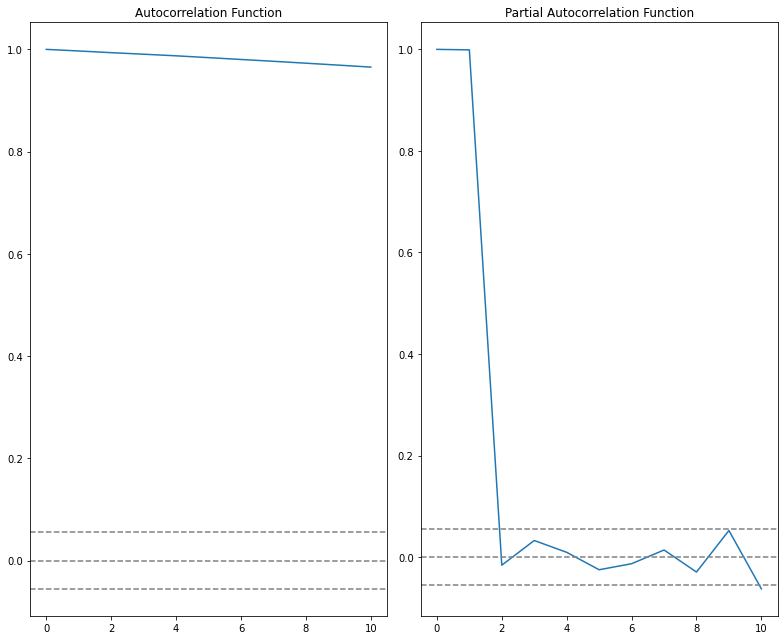

In [0]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df['close'], nlags=10)
lag_pacf = pacf(df['close'], nlags=10, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ret)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_ret)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ret)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_ret)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0255')

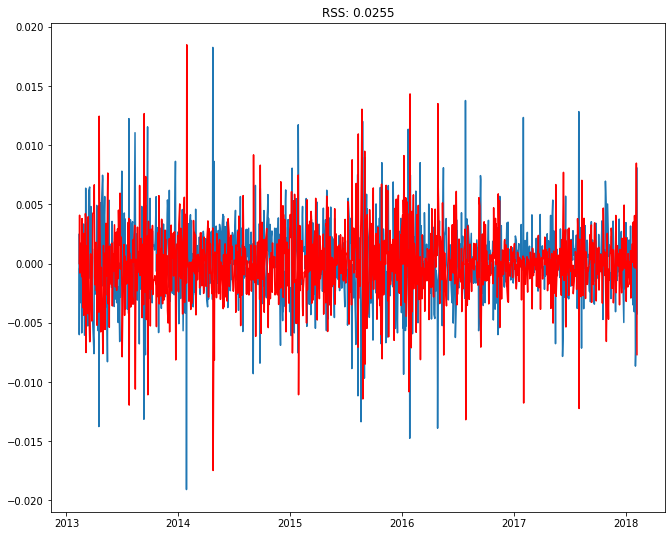

In [0]:
model = ARIMA(df_ret, order=(1, 1, 1))  
results_ARIMA = model.fit()  
plt.plot(df_ret)
plt.plot(results_ARIMA.fittedvalues, color='red')
rss = np.nansum((results_ARIMA.fittedvalues-df_ret)**2)
plt.title('RSS: %.4f'% rss)

In [0]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 1257
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5439.740
Method:                       css-mle   S.D. of innovations              0.003
Date:                Sun, 10 May 2020   AIC                         -10871.480
Time:                        04:17:38   BIC                         -10850.934
Sample:                             1   HQIC                        -10863.758
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.694e-08   2.56e-07     -0.144      0.885   -5.39e-07    4.66e-07
ar.L1.D.close     0.0352      0.028      1.248      0.212      -0.020       0.091
ma.L1.D.close    -0.9999      0.002   -4

In [0]:
#divide into train and test set
train = df_ret[:int(0.7*(len(df_ret)))]
test = df_ret[int(0.7*(len(df_ret))):]

In [0]:
# Building the model
model = auto_arima(df['close'], trace=True, error_action='ignore', suppress_warnings=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=4707.968, BIC=4738.792, Fit time=1.774 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4716.112, BIC=4726.386, Fit time=0.043 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=4717.820, BIC=4733.231, Fit time=0.108 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4717.799, BIC=4733.211, Fit time=0.156 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=4720.484, BIC=4746.170, Fit time=0.484 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=4710.486, BIC=4746.447, Fit time=2.742 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4720.406, BIC=4746.092, Fit time=0.582 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=4719.553, BIC=4755.514, Fit time=2.725 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=4718.052, BIC=4738.601, Fit time=0.765 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_o

In [0]:
results = model.fit(df['close'])

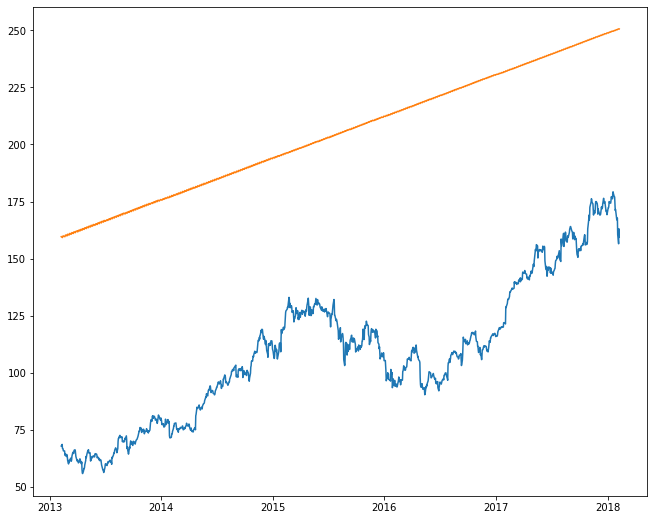

In [0]:
forecast = model.predict(n_periods=len(df['close']))
forecast = pd.DataFrame(forecast, index = df['close'].index, columns=['Prediction'])

#plot the predictions for validation set
plt.plot(df['close'], label='Train')
#plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

In [0]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test,forecast))
print(rms)

ValueError: ignored

In [0]:
# GARCH Models

In [0]:
!pip install arch
!pip install pandas_datareader

In [0]:
from arch import arch_model
model=arch_model(df_ret, vol='Garch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -5477.112036263077
Iteration:      2,   Func. Count:     21,   Neg. LLF: -5477.754744932159
Iteration:      3,   Func. Count:     37,   Neg. LLF: -4917.471207382035
Iteration:      4,   Func. Count:     53,   Neg. LLF: 6276.4155337748625
Iteration:      5,   Func. Count:     69,   Neg. LLF: 6212395.243431682
Inequality constraints incompatible    (Exit mode 4)
            Current function value: 6212395.338730617
            Iterations: 6
            Function evaluations: 69
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  close   R-squared:               -17374277.226
Mean Model:             Constant Mean   Adj. R-squared:          -17374277.226
Vol Model:                      GARCH   Log-Likelihood:           -6.21240e+06
Distribution:                  Normal   AIC:                       1.24248e+07
Method:            Maximum Likeliho

/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.015e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
